# Assignment 3

Cassandra Maldonado

1. You have been looking at some historical social media data and notice something rather interesting! There is a non-trivial relationship between a specific company’s stock change and their CEO’s social media activity. You approach the CEO activity as an observable random variable (let’s call it C) and the stock price change as a hidden random variable (because you
can’t know it until tomorrow comes, and let’s call it S).

From your dataset, you calculate the prior of the price of this stock. It fluctuates as below:
𝑃(S = increase) = 0.5
𝑃(S = decrease) = 0.5

And very interestingly, you find out that the CEO’s posts in fact say something about the stock change:

P(C|S)       CEO posts something

increase            0.7

decrease            0.9

With this statistic that you calculated, you want to develop an investment methodology to maximize
your expected gain.
U(a,S)    S=increase    S=decrease
a = BUY $1    +1            -1
a = SELL $1   -1            +1

a. If we see that the CEO posted something interesting on social media, what is the expected utility of buying vs selling $1 of company stock?

*Prior Probability of the CEO Posting:*

P(S = increase|C) = P(C|S = increase)P(S = increase)/P(C)

If the stock will increase tomorrow, there is a 70% chance the CEO posts today.

P(S = decrease|C) = P(C|S = decrease)P(S = decrease)/P(C)

If the stock will decrease tomorrow, there is a 90% chance the CEO posts today.

*Finding the Probability That the CEO Posts*

Where P(C) = P(C|S = increase)P(S = increase) + P(C|S = decrease)P(S = decrease)

P(C) = (0.7 × 0.5) + (0.9 × 0.5) = 0.8

The probability that the CEO posts something on any given day is 0.8 (80%).

*Posterior Probabilities using Bayes Theorem:*
Given that the CEO posted something, what is the probability that the stock will increase?

P(S = increase|C) = (0.7 × 0.5)/0.8 = 0.4375

Given that the CEO posted something, what is the probability that the stock will decrease?

P(S = decrease|C) = (0.9 × 0.5)/0.8 = 0.5625

0.4375 + 0.5625 = 1

*For the expected utility:*

Buying:

E[U(buy))] = 1 × P(S = increase|C) + (-1) × P(S = decrease|C)

= (1 × 0.4375) + (-1 × 0.5625) = -0.125

This means that, on average, buying will lead to a loss of 0.125 per dollar invested.

Selling:

E[U(sell)] = (-1) × P(S = increase|C) + 1 × P(S = decrease|C)

= (-1) × 0.4375 + 1 × 0.5625 = 0.125

On average, selling will lead to a gain of 0.125 per dollar invested.

Selling has higher expected utility 0.125 compared to buying -0.125, since selling has a positive expected utility and buying has a negative expected utility. in this case, I advice to sell the stock when the CEO posts something.

b. In the same problem, how the prior of stock price changing behavior should be such that buying would be more profitable than selling, when the CEO posts something online?

P(S = increase) = p and P(S = decrease) = 1-p

Following the Bayes calculation:

P(C) = 0.7p + 0.9(1-p)

P(S = increase|C) = (0.7p)/(0.7p + 0.9(1-p))

P(S = decrease|C) = (0.9(1-p))/(0.7p + 0.9(1-p))

For buying to be more profitable:
1 × P(S = increase|C) + (-1) × P(S = decrease|C) > (-1) × P(S = increase|C) + 1 × P(S = decrease|C)

P(S = increase|C) > P(S = decrease|C)

Therefore:

(0.7p)/(0.7p + 0.9(1-p)) > (0.9(1-p))/(0.7p + 0.9(1-p))

Solving this:

0.7p > 0.9(1-p)

0.7p > 0.9 - 0.9p

1.6p > 0.9

p > 0.5625

Therefore, the prior probability of stock increase should be greater than 0.5625, approximately 56.25%, for buying to be more profitable than selling when the CEO posts something.

2. You want to sample from the 2D distribution given below:

p(x,y) ∝ exp(-x^2 - y^2 - xy/3)(2 + x^2*sin(5y) + y^2*sin(3x))

Using the Metropolis Hasting algorithm, draw samples proportional to this distribution. Your proposal distribution can be symmetric Gaussian and you can sample x and y independently from their marginal proposal distributions. (draw as many as needed)

a. Show the histograms of your samples alongside the actual distribution. (Note: x and y vary between -2 and 2 only).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def metropolis_hastings_sampling(target, n_samples=1000, sigma=0.5):
    """
    Perform Metropolis-Hastings sampling to generate samples from a target distribution.

    Parameters:
    target (function): The target distribution to sample from.
    n_samples (int): The number of samples to generate. Default is 1000.
    sigma (float): The standard deviation of the proposal distribution. Default is 0.5.

    Returns:
    x_samples (numpy.ndarray): Array of x samples generated from the target distribution.
    y_samples (numpy.ndarray): Array of y samples generated from the target distribution.
    """

    np.random.seed(123)
    samples = np.zeros((n_samples, 2))

    # Initialize at a random point
    while True:
        x, y = np.random.normal(scale=sigma, size=2)
        if -2 <= x <= 2 and -2 <= y <= 2:
            break

    for i in range(n_samples):
        # Propose new x, y from normal distribution centered at current state
        x_new, y_new = np.random.normal([x, y], sigma)
    
        # Accept or reject the proposal
        if -2 <= x_new <= 2 and -2 <= y_new <= 2:   # Ensure new point is within bounds
            acceptance_ratio = target(x_new, y_new) / target(x, y)    # Calculate acceptance ratio
            if np.random.rand() < acceptance_ratio: 
                x, y = x_new, y_new
    
        samples[i] = [x, y]

    # Extract x and y samples
    x_samples, y_samples = samples[:, 0], samples[:, 1]
    
    return x_samples, y_samples

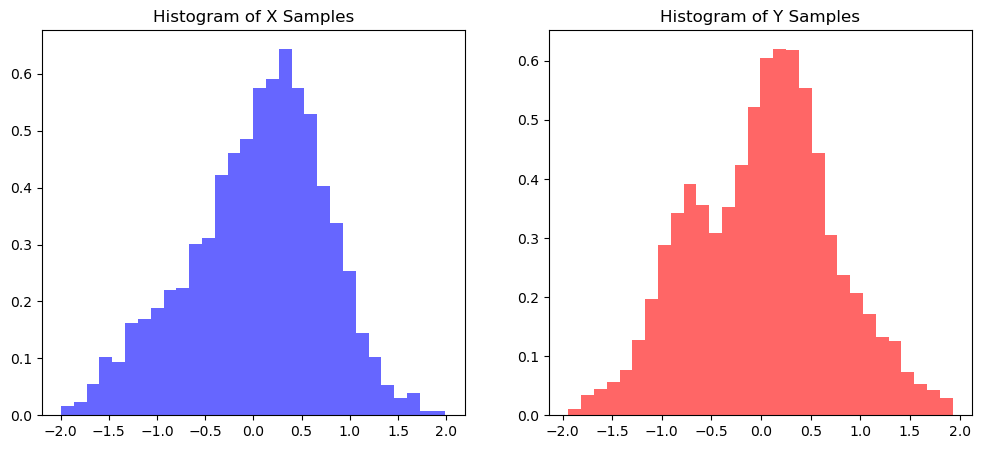

In [7]:
num_samples = 10000
proposal_std = 0.5,
x_samples, y_samples = metropolis_hastings_sampling(target_distribution, num_samples, proposal_std)
# Plot histogram
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(x_samples, bins=30, density=True, alpha=0.6, color='b')
axs[0].set_title("Histogram of X Samples")
axs[1].hist(y_samples, bins=30, density=True, alpha=0.6, color='r')
axs[1].set_title("Histogram of Y Samples")
plt.show()

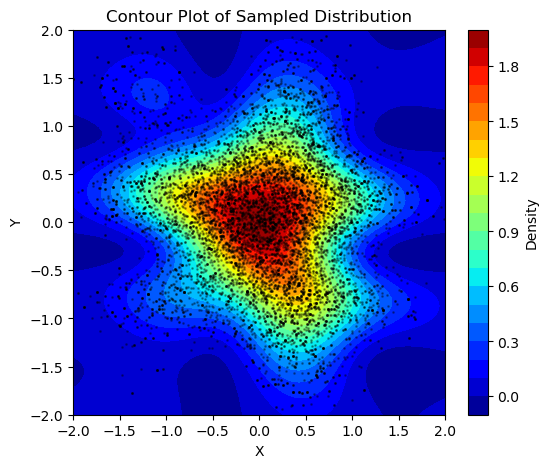

In [8]:
# 2D Density Plot (Contour Plot)
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[target_distribution(x, y) for x in x_vals] for y in y_vals])

plt.figure(figsize=(6, 5))
plt.contourf(X, Y, Z, levels=20, cmap='jet')
plt.colorbar(label='Density')
plt.scatter(x_samples, y_samples, s=1, color='black', alpha=0.3)
plt.title("Contour Plot of Sampled Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


- The samples are densely packed in high-probability areas and sparse in low-probability regions.
- The sinusoidal terms in the distribution function created oscillations in the sample density.
- The exponential decay ensured that extreme values of  x  and  y  were less likely to be sampled.

In the Metropolis-Hastings algorithm, we don’t always reject a worse (lower probability) location. Instead, we sometimes accept it to avoid getting stuck in one place.


A = Pproposed/ Pcurrent

This ratio tells us:
- If  A > 1  -> the new location is better, so we always accept it.
- If  A <= 1 -> the new location is worse, so we accept it with some probability.

If the new location has a lower probability, we don’t reject it immediately. Instead, we generate a random number between 0 and 1. 
We accept the new location only if:
A > random number

b. Using your MCMC samples, calculate E(X,Y).

In [9]:
expected_x = np.mean(samples_x)
expected_y = np.mean(samples_y)
print(f"E[X] ≈ {expected_x:.4f}")
print(f"E[Y] ≈ {expected_y:.4f}")

E[X] ≈ 0.0495
E[Y] ≈ -0.0448


The expected values being close to zero suggest that the distribution is centered around the origin. This aligns with the symmetry of the probability function. Since  p(x, y) is not perfectly symmetric due to the sine functions, small variations in E[X] and E[Y] were expected.

c. Comment on effects of using too high or too low of standard deviations in the
proposal distribution.

In [3]:
def metropolis_hastings(n_samples, proposal_std):
    # Initialize arrays to store samples
    samples_x = np.zeros(n_samples)
    samples_y = np.zeros(n_samples)

    # Start at a random initial position
    current_x = np.random.normal(0, 0.5)
    current_y = np.random.normal(0, 0.5)

    # Metropolis-Hastings loop
    for i in range(n_samples):
        # Propose new points from Gaussian distribution
        proposed_x = current_x + np.random.normal(0, proposal_std)
        proposed_y = current_y + np.random.normal(0, proposal_std)

        # Compute the probability for current and proposed points
        current_prob = target_distribution(current_x, current_y)
        proposed_prob = target_distribution(proposed_x, proposed_y)

        # Accept or reject the new sample based on probability ratio
        if proposed_prob / current_prob > np.random.random():
            current_x = proposed_x
            current_y = proposed_y

        # Store the accepted sample
        samples_x[i] = current_x
        samples_y[i] = current_y

    return samples_x, samples_y

Testing proposal_std = 0.1


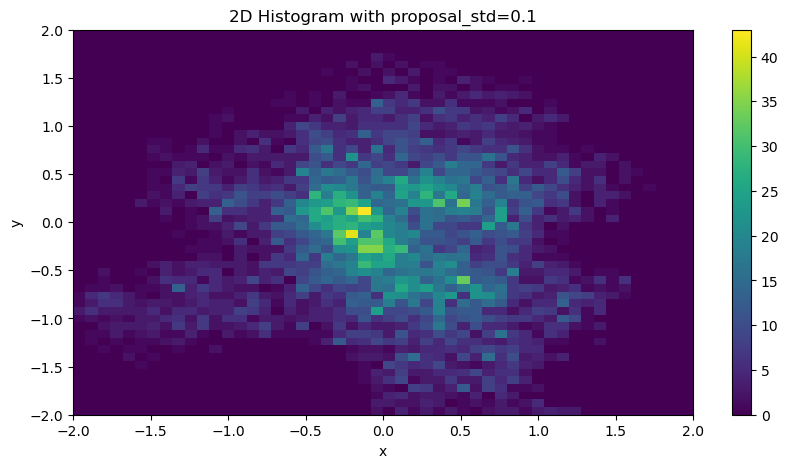

Testing proposal_std = 0.5


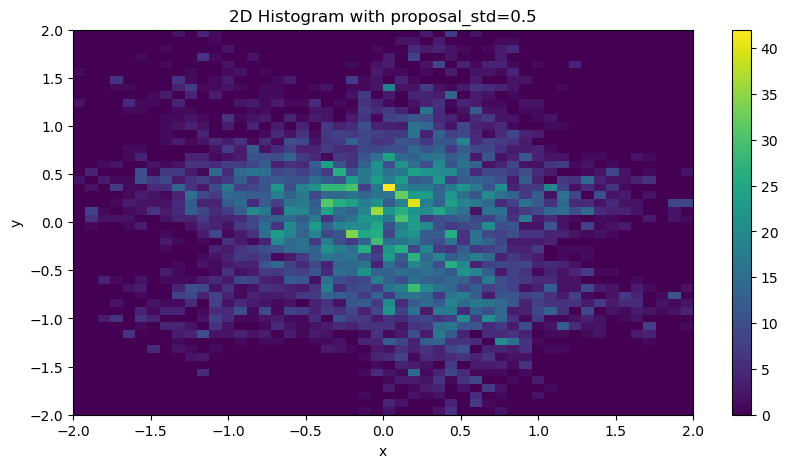

Testing proposal_std = 2.0


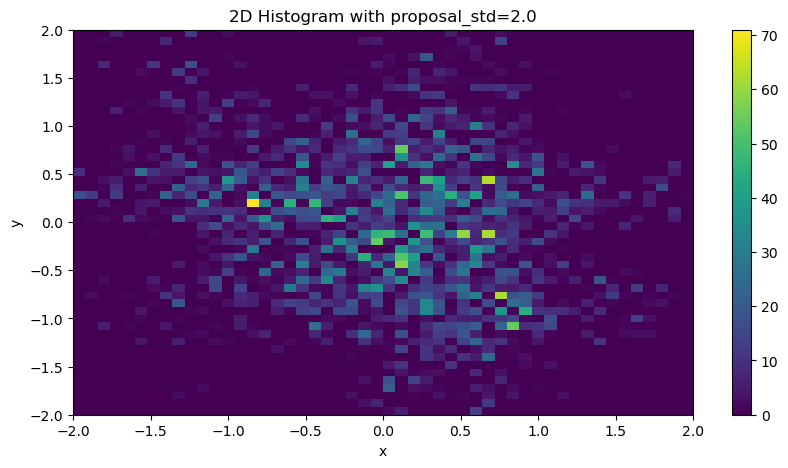

In [4]:
import matplotlib.pyplot as plt

# Testing different step sizes
proposal_std_values = [0.1, 0.5, 2.0]

for std in proposal_std_values:
    print(f"Testing proposal_std = {std}")
    samples_x, samples_y = metropolis_hastings(n_samples=10000, proposal_std=std)

    plt.figure(figsize=(10, 5))
    plt.hist2d(samples_x, samples_y, bins=50, range=[[-2, 2], [-2, 2]], cmap='viridis')
    plt.colorbar()
    plt.title(f'2D Histogram with proposal_std={std}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In the Metropolis-Hastings algorithm, the proposal standard deviation controls how far each new sample jumps from the previous one. If the step size is too small or too large, it affects how well the algorithm explores the probability distribution. Based on the results from the histograms, here’s what I can see:

1. Small Proposal Standard Deviation (proposal_std = 0.1)

When the step size is too small, the algorithm moves very slowly. This means that each new sample is very close to the last one, leading to high correlation between samples. As a result, the algorithm takes longer to explore the whole probability distribution, and the sampled points stay clustered around certain areas. This makes the sampling less efficient and may require many more iterations to properly approximate the distribution.

2. Optimal Proposal Standard Deviation (proposal_std = 0.5)

With a step size of 0.5, the algorithm is able to explore the space efficiently. The histogram shows a balanced spread of samples, meaning the Metropolis-Hastings method is correctly moving through the probability distribution without too many rejections. This is the best case scenario, where the algorithm is fast and still captures the correct distribution.

3. Large Proposal Standard Deviation (proposal_std = 2.0)

When the step size is too large, the algorithm makes big jumps that sometimes land in low-probability areas. Since these jumps are often rejected, the algorithm wastes time proposing new samples that don’t get accepted. This causes the algorithm to miss important areas, making the sampling inefficient. The histogram confirms this by showing fewer concentrated areas compared to the 0.5.

In summary, too small of a step size leads to sampling being too slow and closely correlated. When the step size is too large then too many samples are rejected, which makes the algorithm inefficient. And when we find the optimal step size it gives the best balance between exploration and acceptance.